In [19]:
from model import UNetModel
from dataset import get_dataset
from itertools import islice
import matplotlib.pyplot as plt
import torch
from PIL import Image

In [2]:
model = UNetModel.load_from_checkpoint("/root/unet-coloring/6abuvx9a/checkpoints/epoch=499-step=7500.ckpt")

In [17]:
def visualize(v, hs):
    hsv = torch.cat([hs, v + 0.5], dim=0).cpu()
    hsv = (hsv * 255.0).to(torch.uint8).permute(1, 2, 0).numpy()
    return Image.fromarray(hsv, mode="HSV").convert("RGB")

In [6]:
_, val_dataset = get_dataset()

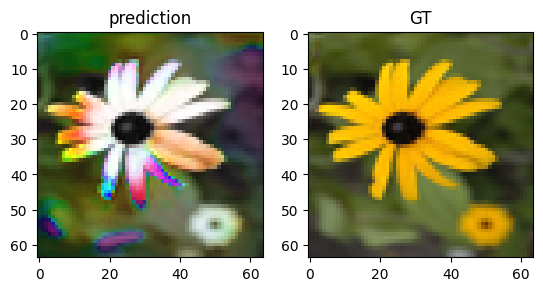

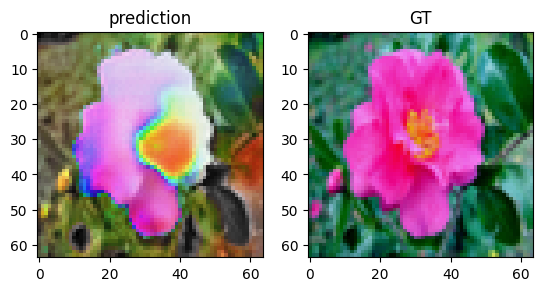

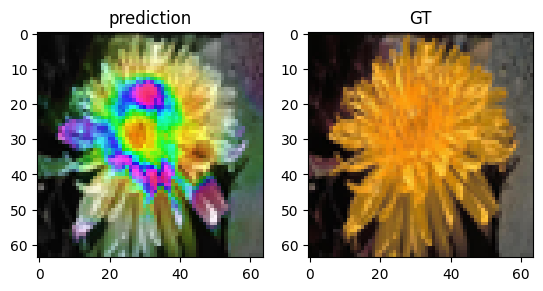

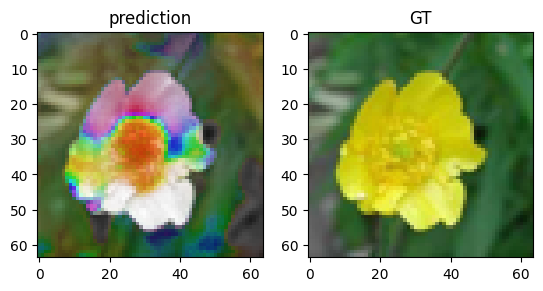

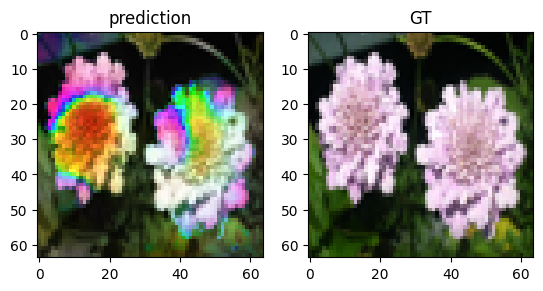

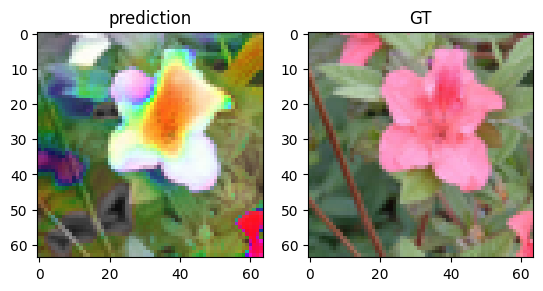

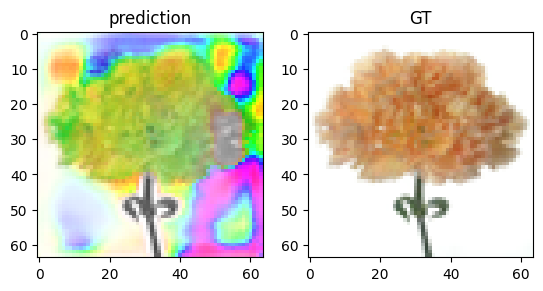

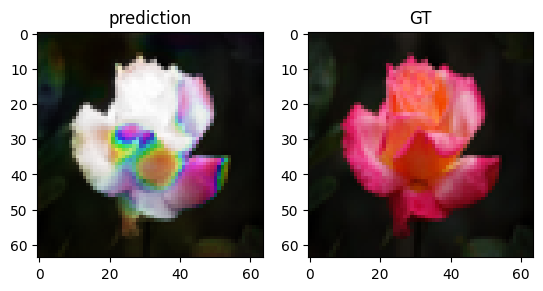

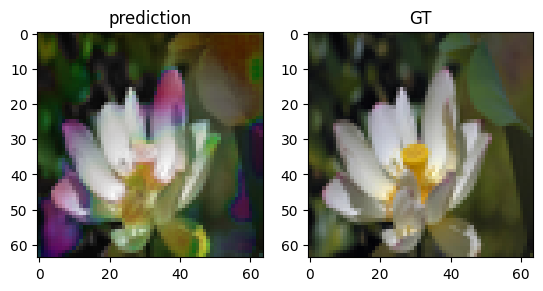

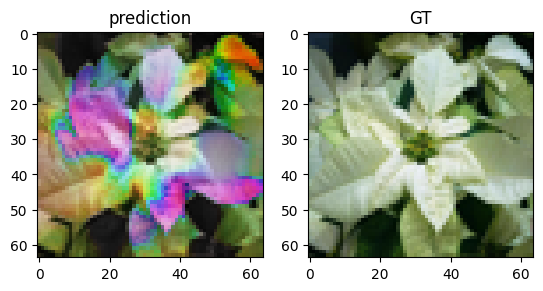

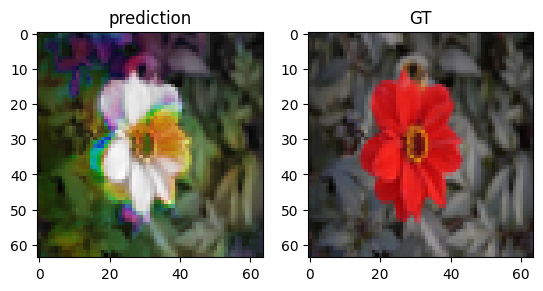

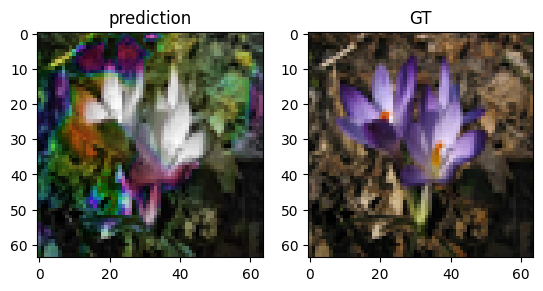

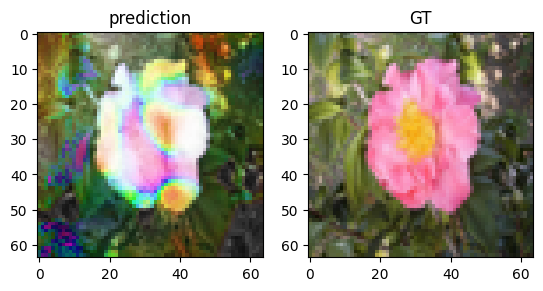

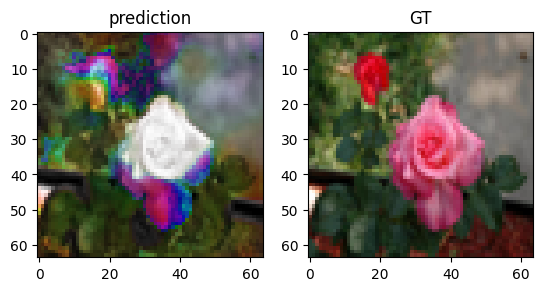

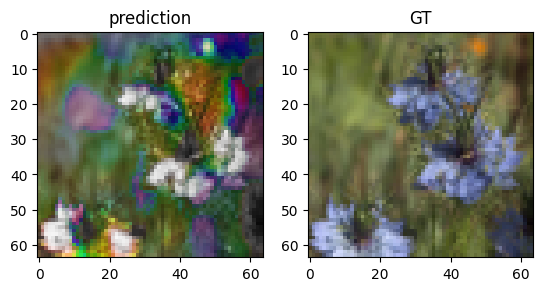

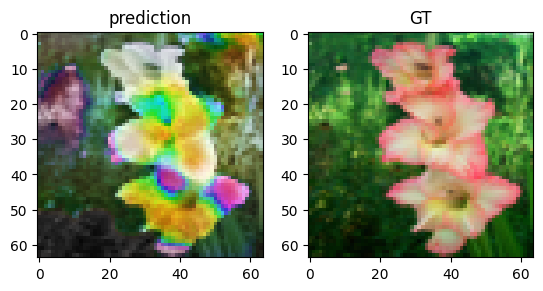

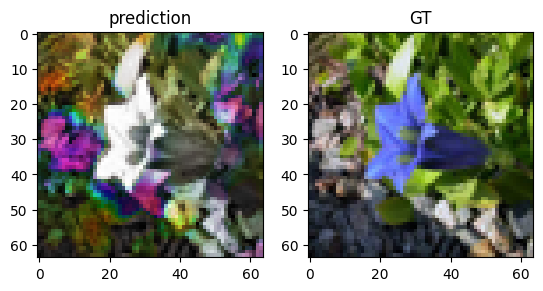

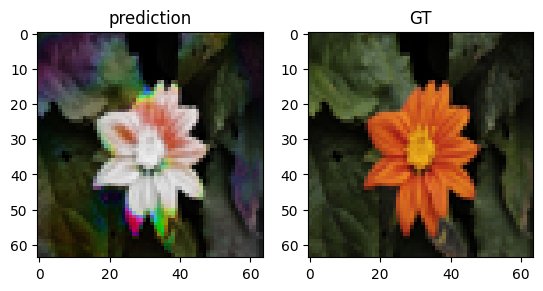

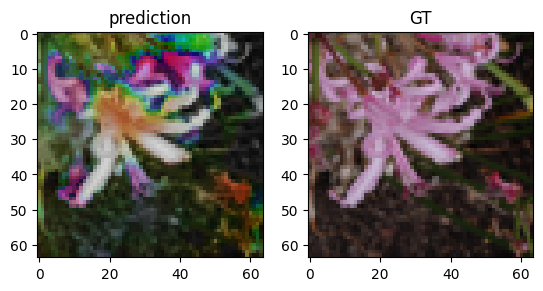

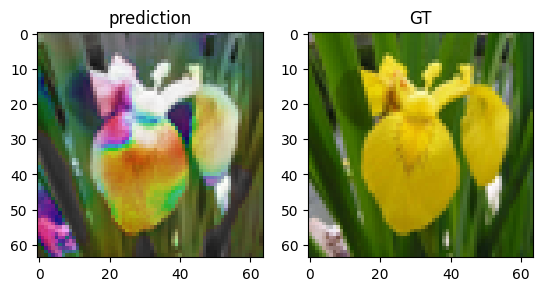

In [20]:
for in_v, gt_hs in islice(val_dataset, 20):
    in_v = in_v.to("cuda")
    gt_hs = gt_hs.to("cuda")
    pred_hs = model(in_v[None,])[0]
    plt.subplot(1, 2, 1)
    plt.imshow(visualize(in_v, pred_hs))
    plt.title("prediction")
    plt.subplot(1, 2, 2)
    plt.imshow(visualize(in_v, gt_hs))
    plt.title("GT")
    plt.show()